# Kundenbedienung

In diesem Anwendungsbeispiel werden wir 

Note: you may need to restart the kernel to use updated packages.


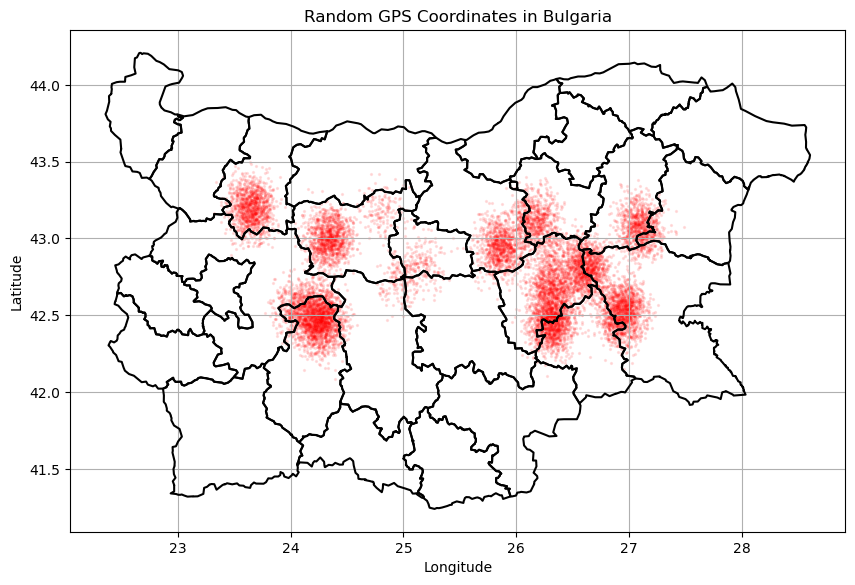

In [35]:
# Generate 200 times 2 matrix of random GPS coordinates 
# centered within Bulgaria border limits

%pip install geopandas shapely

import numpy as np
import pandas as pd

# Use np.random

np.random.seed(545)

# Bulgaria approximate boundary limits
# Latitude and Longitude limits

# These values are approximate and should be adjusted based on actual borders
# of Bulgaria for more accurate random points.
# Latitude: 41.2 to 44.2
# Longitude: 22.4 to 28.2


lat_min, lat_max = 42.4, 43.2
lon_min, lon_max = 23.5, 27.1
# Generate 200 random GPS coordinates

num_centroids = 15
latitudes = np.random.uniform(lat_min, lat_max, num_centroids)
longitudes = np.random.uniform(lon_min, lon_max, num_centroids)

# Combine into a matrix
centroid_coordinates = np.column_stack((latitudes, longitudes))

# For each centroid, generate 350 random points within a radius of 20 km

radius = 0.1  # Approximate radius in degrees (20 km)
# Note: 1 degree of latitude is approximately 111 km, and 1 degree of longitude varies with latitude

coordinates = []
for lat, lon in centroid_coordinates:
    # Generate random points around the centroid
    cl_size = np.random.randint(100, 2000)
    latitudes = np.random.normal(size=cl_size, loc=lat, scale=radius)
    longitudes = np.random.normal(size=cl_size, loc=lon, scale=radius)
    coordinates.extend(zip(latitudes, longitudes))

# Plot these coordinates on a map of Sofia

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import geopandas as gpd


# Load Bulgaria provinces geojson file

bulgaria_map = gpd.read_file('https://raw.githubusercontent.com/yurukov/Bulgaria-geocoding/refs/heads/master/provinces.geojson')

# Create a GeoDataFrame from the coordinates
geometry = [Point(lon, lat) for lat, lon in coordinates]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Plot the map of Bulgaria and the random points
fig, ax = plt.subplots(figsize=(10, 10))
bulgaria_map.boundary.plot(ax=ax, color='black')
gdf.plot(ax=ax, color='red', markersize=2, alpha=0.1)
plt.title('Random GPS Coordinates in Bulgaria')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.xlim(lon_min, lon_max)
# plt.ylim(lat_min, lat_max)
plt.grid()
plt.show()

<Axes: >

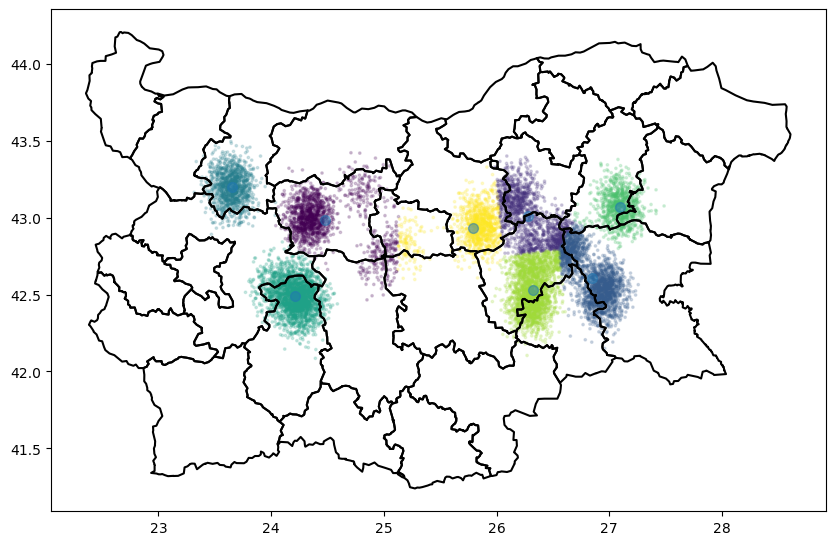

In [46]:
# k-means clustering

from sklearn.cluster import KMeans

# Convert the coordinates to a DataFrame for KMeans
coordinates_df = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])
coordinates_df = coordinates_df.astype(float)

num_clusters = 8
# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(coordinates_df)
gdf['Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=['Latitude', 'Longitude'])
centroids_gdf = gpd.GeoDataFrame(centroids_df, geometry=gpd.points_from_xy(centroids_df['Longitude'], centroids_df['Latitude']), crs="EPSG:4326")
centroids_gdf['Cluster'] = range(num_clusters)

# Plot the centroid coordinates 

fig, ax = plt.subplots(figsize=(10, 10))
bulgaria_map.boundary.plot(ax=ax, color='black')
gdf.plot(ax=ax, column="Cluster", markersize=3, alpha=0.2)
centroids_gdf.plot(ax=ax, markersize=50, alpha=0.5, label='Centroids')
